In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
# Step 1: Load Data
df = pd.read_csv("creditcard_2023.csv")

In [3]:
# Step 2: Data Exploration
print("Dataset Overview:")
print(df.info())
print("\nClass Distribution:")
print(df['Class'].value_counts(normalize=True) * 100)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float

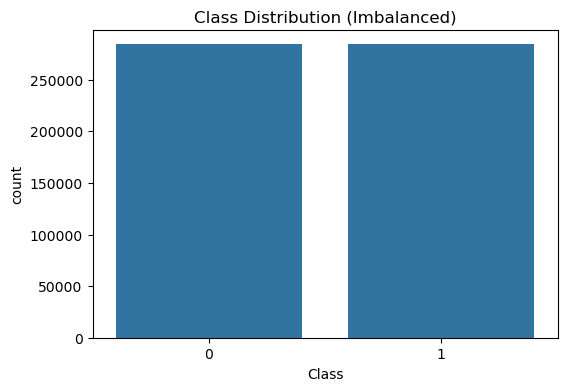

In [4]:
# Step 3: Data Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Class'])
plt.title("Class Distribution (Imbalanced)")
plt.show()

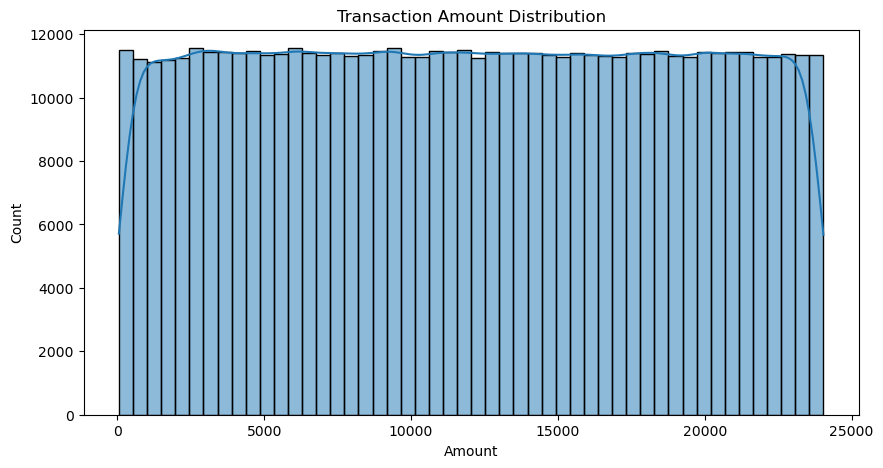

In [5]:
# Distribution of Transaction Amount
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

In [6]:
# Step 4: Data Preprocessing
# Drop 'id' column if present
df.drop(columns=['id'], inplace=True, errors='ignore')

In [7]:
# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({0: 227452, 1: 227452})


In [28]:
# Step 5: Model Training
# Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]
print("\nLogistic Regression Model Performance:")
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Training Logistic Regression...

Logistic Regression Model Performance:
ROC-AUC Score: 0.9934995543387278
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



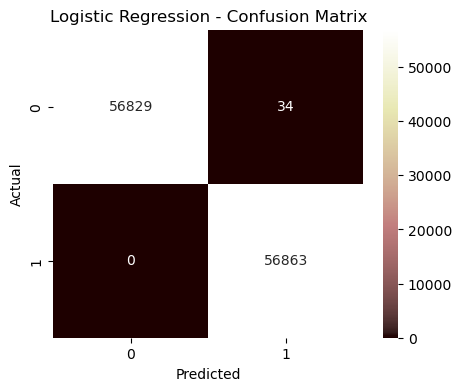

In [40]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='pink')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
# Random Forest with Reduced Complexity
print("\nTraining Random Forest with Cross-Validation...")
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Random Forest CV ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC Score:", np.mean(cv_scores))
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Model Performance:")
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))



Training Random Forest with Cross-Validation...
Random Forest CV ROC-AUC Scores: [0.99945239 0.99941736 0.99945306 0.99947321 0.99931388]
Mean ROC-AUC Score: 0.9994219833422594

Random Forest Model Performance:
ROC-AUC Score: 0.9993735723949165
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56863
           1       1.00      0.97      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



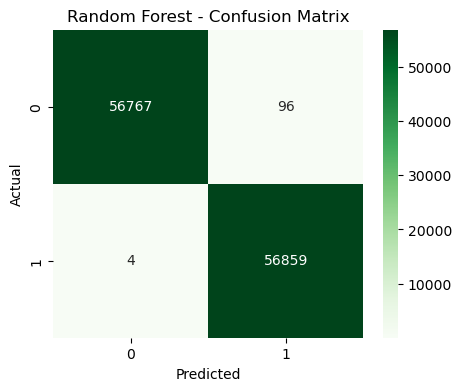

In [56]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
# XGBoost with Reduced Complexity
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=50, max_depth=6)
print("\nTraining XGBoost with Cross-Validation...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=6)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
print("XGBoost CV ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC Score:", np.mean(cv_scores))
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]
print("\nXGBoost Model Performance:")
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Training XGBoost with Cross-Validation...
XGBoost CV ROC-AUC Scores: [0.9999673  0.99995673 0.99996538 0.99996002 0.99995992]
Mean ROC-AUC Score: 0.9999618713085683

XGBoost Model Performance:
ROC-AUC Score: 0.9999533116953991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



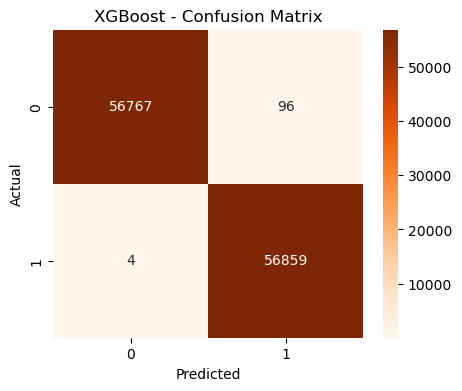

In [50]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()